# Querying ECCO variables and descriptions



## What is a ShortName?

On NASA Earthdata, ECCO output is organized into [datasets](https://ecco-access.readthedocs.io/en/latest/ECCO_output_on_NASA_Earthdata.html#ecco-dataset-and-variable-lists), each consisting of a few related variables. (For example, the "sea surface height" dataset contains three sea surface height variables, each with different corrections applied, as well as a variable containing one of the correction amounts.) Each dataset is identified by a "ShortName", which is a quick way to identify and locate the dataset on [Earthdata search](https://search.earthdata.nasa.gov) and in the [Common Metadata Repository (CMR)](https://www.earthdata.nasa.gov/engage/open-data-services-software/earthdata-developer-portal). The ShortName for the monthly sea surface height dataset on the native LLC90 grid is *ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4*.


## But...what if you don't know the ShortName already? Find your data with *ecco_access*

Earthdata datasets are identified by ShortNames, but you might not know the ShortName of the variable or category of variables that you are seeking. One way to find the ShortName is to consult these [ECCO variable lists](https://ecco-access.readthedocs.io/en/latest/ECCO_output_on_NASA_Earthdata.html#ecco-dataset-and-variable-lists). But the "query" in `ecco_access` functions does not have to be a ShortName; it can also be a text string representing a variable name, or a word or phrase in the variable description.

For example, perhaps you are looking to open the dataset that has native grid monthly sea ice concentration in 2007. If the query is not identified as a ShortName, then a text search of the variable lists is conducted using *query*, *grid*, and *time_res*. Then of the identified matches, the user is asked to select one.

In [1]:
import numpy as np
import xarray as xr
from os.path import join,expanduser
import matplotlib.pyplot as plt

import ecco_access as ea

# identify user's home directory
user_home_dir = expanduser('~')

# query variable lists for "ice" and open the selected result as an xarray dataset
ds_seaice_conc = ea.ecco_podaac_to_xrdataset('ice',grid='native',time_res='monthly',\
                                               StartDate='2007-01',EndDate='2007-12',\
                                               mode='download_ifspace',\
                                               download_root_dir=\
                                                 join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC'),\
                                               max_avail_frac=0.5)

ShortName Options for query "ice":
                  Variable Name     Description (units)

Option 1: ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4    *native grid,monthly means*
                  SSH               Dynamic sea surface height anomaly. Suitable for
                                    comparisons with altimetry sea surface height data
                                    products that apply the inverse barometer
                                    correction. (m)
                  SSHIBC            The inverted barometer correction to sea surface
                                    height due to atmospheric pressure loading. (m)
                  SSHNOIBC          Sea surface height anomaly without the inverted
                                    barometer correction. Suitable for comparisons
                                    with altimetry sea surface height data products
                                    that do NOT apply the inverse barometer
                                

Please select option [1-8]:  5


Using dataset with ShortName: ECCO_L4_SEA_ICE_CONC_THICKNESS_LLC0090GRID_MONTHLY_V4R4
Creating download directory /home/jpluser/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SEA_ICE_CONC_THICKNESS_LLC0090GRID_MONTHLY_V4R4
Size of files to be downloaded to instance is 0.06 GB,
which is 0.3% of the 20.008 GB available storage.
Proceeding with file downloads via NASA Earthdata URLs
DL Progress: 100%|#########################| 12/12 [00:04<00:00,  2.56it/s]

total downloaded: 64.66 Mb
avg download speed: 13.73 Mb/s
Time spent = 4.708296537399292 seconds




We select option 5, corresponding to ShortName ECCO_L4_SEA_ICE_CONC_THICKNESS_LLC0090GRID_MONTHLY_V4R4. Let's look at the dataset contents.

In [2]:
ds_seaice_conc

<xarray.Dataset> Size: 25MB
Dimensions:    (time: 12, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j          (j) int32 360B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 360B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 52B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 96B 2007-01-16T12:00:00 ... 2007-12-16T1...
    ...         ...
    YC         (tile, j, i) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 421kB dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    XC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
    YC_bnds    (tile, j, i, nb) float32 2MB dask.array<chunksize=(13, 90, 90, 4), meta=np.ndarray>
Dimensions without coordinates: nv, nb
Data variables:
    SIarea     (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SIheff     (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    SIhsnow    (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    sIceLoad   (time, tile, j, i) float32 5MB dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1M
    time_coverage_end:            2007-02-01T00:00:00
    time_coverage_resolution:     P1M
    time_coverage_start:          2007-01-01T00:00:00
    title:                        ECCO Sea-Ice and Snow Concentration and Thi...
    uuid:                         e6cdf192-400d-11eb-93b5-0cc47a3f49c3

Now plot the sea ice concentration/fraction in tile 6 (which approximately covers the Arctic Ocean), during Sep 2007 which at the time was a record minimum for Arctic sea ice.

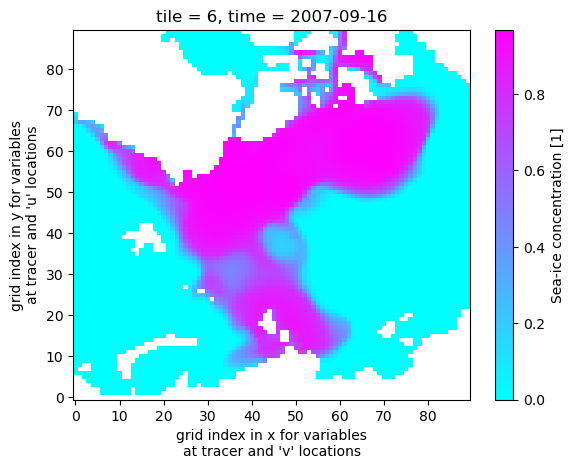

In [3]:
ds_seaice_conc.SIarea.isel(time=8,tile=6).plot(cmap='cool')